# Read files and extract information

There is an example of how to read files and extract information from them.

suppose you have some g16log files in a folder like this:

In [1]:
! ls -l ../tests/test_files/g16log/

total 33748
-rw-r--r-- 1 tmj tmj  727184 Nov  4 20:14 11_Opt.log
-rw-r--r-- 1 tmj tmj   53139 Jan  9 20:53 3_Sp.log
-rw-r--r-- 1 tmj tmj 8008984 Feb 18 20:12 RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log
-rw-r--r-- 1 tmj tmj 1424205 Nov  4 20:14 S_Ph_Ni_TS.log
-rw-r--r-- 1 tmj tmj 1910081 Jan 16 10:24 TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log
-rw-r--r-- 1 tmj tmj   65746 Jan 16 10:28 TS_4cGKps_ll_ad_4-18_6-13_sp_g16.log
-rw-r--r-- 1 tmj tmj 3896697 Jan 15 22:37 TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log
-rw-r--r-- 1 tmj tmj 1307536 Jan 16 10:28 TS_ts_guess_FaFxyx_template_4-18_6-13_optts_conf_g16.log
-rw-r--r-- 1 tmj tmj  165117 Feb 17 22:09 dsgdb9nsd_000001-3-.log
-rw-r--r-- 1 tmj tmj  823921 Jan 16 16:32 dsgdb9nsd_000107-3-.log
-rw-r--r-- 1 tmj tmj  703600 Jan 16 14:55 dsgdb9nsd_000180-9-.log
-rw-r--r-- 1 tmj tmj  385852 Jan 23 21:10 dsgdb9nsd_000484-1+.log
-rw-r--r-- 1 tmj tmj  509600 Jan 22 21:03 dsgdb9nsd_000672-3+.log
-rw-r--r-- 1 tmj tmj  583565 Jan 1

Looks like chaos? Yes, they are mixture from some different projects. MolOP can help you to read files and extract information from them through universal methods.

In [2]:
from molop import AutoParser
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  # for better drawing

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400, 400

files = AutoParser("../tests/test_files/g16log/*.log")

MolOP parsing with 28 jobs: 100%|██████████| 39/39 [00:03<00:00, 10.88it/s]
0 files failed to parse, 39 successfully parsed


We can first get the summary of the files. The summary contains the structure information(SMILES) and some key QM information of the files.

In [3]:
files.to_summary_df()

,parser,file_name,file_path,file_format,charge,multiplicity,SMILES,status,ZPE,TCE,...,sp,HOMO,LUMO,GAP,first freq,first freq tag,second freq,second freq tag,S**2,S
0,G16LOGParser,11_Opt.log,/home/tmj/proj/MolOP/tests/test_files/g16log/1...,.log,0,1,C=C[C@H]1[C@@H]2[C@H](C[C@@]1(C)O)OC[C@@H]2C,"{'Maximum Force': True, 'RMS Force': True,...",0.275585,0.287903,...,-579.925317,-0.21880,-0.01452,0.20428,76.8500,False,94.3685,False,NaN,NaN
1,G16LOGParser,3_Sp.log,/home/tmj/proj/MolOP/tests/test_files/g16log/3...,.log,0,1,CCC[C@H]1CO[C@H]2C[C@@](C)(O)C[C@@H]12,"{'termination': 'Normal', 'SCF Done': True}",NaN,NaN,...,-581.780923,-0.21593,0.02581,0.24174,NaN,None,NaN,None,NaN,NaN
2,G16LOGParser,RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-An...,/home/tmj/proj/MolOP/tests/test_files/g16log/R...,.log,-1,1,CC(C)(C)[C@@H]1COC(=[C-]C2[N-][C@H](C(C)(C)C)C...,"{'Maximum Force': True, 'RMS Force': True,...",0.643965,0.682345,...,-1828.223960,-0.06449,0.00990,0.07439,-126.5511,True,14.3776,False,NaN,NaN
3,G16LOGParser,S_Ph_Ni_TS.log,/home/tmj/proj/MolOP/tests/test_files/g16log/S...,.log,0,1,[Br-].[Br-].[Ni@OH26+3]c1ccccc1.[S-]Cc1ccccc1....,"{'Maximum Force': True, 'RMS Force': True,...",0.361561,0.388680,...,-1549.053550,-0.18821,-0.11033,0.07788,-185.8656,True,15.8954,False,-0.0000,-0.0000
4,G16LOGParser,TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log,/home/tmj/proj/MolOP/tests/test_files/g16log/T...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(/C)[O-].COC(=O)C#CC(...,"{'Maximum Force': True, 'RMS Force': True,...",0.251882,0.277379,...,-1287.359810,-0.25863,-0.10047,0.15816,-300.8307,True,16.9570,False,NaN,NaN
5,G16LOGParser,TS_4cGKps_ll_ad_4-18_6-13_sp_g16.log,/home/tmj/proj/MolOP/tests/test_files/g16log/T...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(/C)[O-].COC(=O)C#CC(...,"{'termination': 'Normal', 'SCF Done': True}",NaN,NaN,...,-1288.848920,-0.26367,-0.10703,0.15664,NaN,None,NaN,None,NaN,NaN
6,G16LOGParser,TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log,/home/tmj/proj/MolOP/tests/test_files/g16log/T...,.log,0,1,C=[N+](C)[N-]C.COC(=O)[C@@]1(OC)C#CC(Br)(Br)CCCC1,"{'Maximum Force': True, 'RMS Force': True,...",0.349175,0.373165,...,-6028.920709,-0.20404,-0.04169,0.16235,-56.8630,True,29.9487,False,NaN,NaN
7,G16LOGParser,TS_ts_guess_FaFxyx_template_4-18_6-13_optts_co...,/home/tmj/proj/MolOP/tests/test_files/g16log/T...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(\C)[O-].COC(=O)C#CC(...,"{'Maximum Force': True, 'RMS Force': True,...",0.252491,0.277515,...,-1287.367861,-0.25447,-0.11005,0.14442,-252.4100,True,25.8663,False,NaN,NaN
8,G16LOGParser,dsgdb9nsd_000001-3-.log,/home/tmj/proj/MolOP/tests/test_files/g16log/d...,.log,-1,1,[CH3-],"{'termination': 'Normal', 'SCF Done': True}",NaN,NaN,...,-39.857502,0.06578,0.17809,0.11231,NaN,None,NaN,None,NaN,NaN
9,G16LOGParser,dsgdb9nsd_000107-3-.log,/home/tmj/proj/MolOP/tests/test_files/g16log/d...,.log,-1,1,[C-]#CCC#C,"{'termination': 'Normal', 'SCF Done': True}",NaN,NaN,...,-192.274958,0.00382,0.13824,0.13442,NaN,None,NaN,None,NaN,NaN


We concern about the TS in those log files.

In [4]:
TS_files = files.filter_TS()
TS_files.to_summary_df()

,parser,file_name,file_path,file_format,charge,multiplicity,SMILES,status,ZPE,TCE,...,sp,HOMO,LUMO,GAP,first freq,first freq tag,second freq,second freq tag,S**2,S
0,G16LOGParser,RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-An...,/home/tmj/proj/MolOP/tests/test_files/g16log/R...,.log,-1,1,CC(C)(C)[C@@H]1COC(=[C-]C2[N-][C@H](C(C)(C)C)C...,"{'Maximum Force': True, 'RMS Force': True,...",0.643965,0.682345,...,-1828.223960,-0.06449,0.00990,0.07439,-126.5511,True,14.3776,False,NaN,NaN
1,G16LOGParser,S_Ph_Ni_TS.log,/home/tmj/proj/MolOP/tests/test_files/g16log/S...,.log,0,1,[Br-].[Br-].[Ni@OH26+3]c1ccccc1.[S-]Cc1ccccc1....,"{'Maximum Force': True, 'RMS Force': True,...",0.361561,0.388680,...,-1549.053550,-0.18821,-0.11033,0.07788,-185.8656,True,15.8954,False,-0.0,-0.0
2,G16LOGParser,TS_4cGKps_ll_ad_4-18_6-13_optts_g16.log,/home/tmj/proj/MolOP/tests/test_files/g16log/T...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(/C)[O-].COC(=O)C#CC(...,"{'Maximum Force': True, 'RMS Force': True,...",0.251882,0.277379,...,-1287.359810,-0.25863,-0.10047,0.15816,-300.8307,True,16.9570,False,NaN,NaN
3,G16LOGParser,TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log,/home/tmj/proj/MolOP/tests/test_files/g16log/T...,.log,0,1,C=[N+](C)[N-]C.COC(=O)[C@@]1(OC)C#CC(Br)(Br)CCCC1,"{'Maximum Force': True, 'RMS Force': True,...",0.349175,0.373165,...,-6028.920709,-0.20404,-0.04169,0.16235,-56.8630,True,29.9487,False,NaN,NaN
4,G16LOGParser,TS_ts_guess_FaFxyx_template_4-18_6-13_optts_co...,/home/tmj/proj/MolOP/tests/test_files/g16log/T...,.log,0,1,CNC(=O)C#[N+]/C(C(C)=O)=C(\C)[O-].COC(=O)C#CC(...,"{'Maximum Force': True, 'RMS Force': True,...",0.252491,0.277515,...,-1287.367861,-0.25447,-0.11005,0.14442,-252.4100,True,25.8663,False,NaN,NaN


A case with not too many atoms

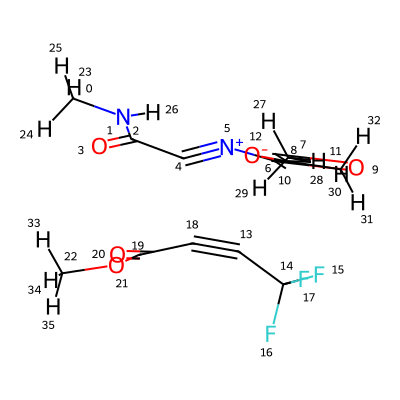

In [5]:
TS_files[2][-1].rdmol

The numeric features (like totoal energy)

In [6]:
TS_files[2][-1].energy

-1287.35981 <Unit('hartree / particle')>

In [7]:
TS_files[2][-1].alpha_energy

{'gap': 0.15816 <Unit('hartree / particle')>,
 'homo': -0.25863 <Unit('hartree / particle')>,
 'lumo': -0.10047 <Unit('hartree / particle')>}

The unit can be transformed to other units powered by [pint](https://pint.readthedocs.io/en/stable/).

In [8]:
TS_files[2][-1].energy.to("kcal/mol")

-807830.4773030282 <Unit('kilocalorie / mole')>

The sequential features (like orbitals, freqs)

In [9]:
TS_files[2][-1].alpha_FMO_orbits[:10]

[-24.73197 <Unit('hartree / particle')>,
 -24.73103 <Unit('hartree / particle')>,
 -24.72836 <Unit('hartree / particle')>,
 -19.19597 <Unit('hartree / particle')>,
 -19.14519 <Unit('hartree / particle')>,
 -19.13671 <Unit('hartree / particle')>,
 -19.13657 <Unit('hartree / particle')>,
 -19.13465 <Unit('hartree / particle')>,
 -14.42477 <Unit('hartree / particle')>,
 -14.38013 <Unit('hartree / particle')>]

Also offer dimensionless features

In [10]:
TS_files[2][-1].dimensionless_alpha_energy

{'gap': 0.15816, 'homo': -0.25863, 'lumo': -0.10047}

The sequential dimensionless features are provided as generator

In [11]:
TS_files[2][-1].dimensionless_frequencies.__next__()

{'freq': -300.8307,
 'is imaginary': True,
 'reduced masses': 11.3735,
 'IR intensities': 63.598,
 'force constants': 0.6064,
 'normal coordinates': [(0.08, -0.0, -0.05),
  (0.08, -0.05, -0.04),
  (0.06, -0.14, -0.0),
  (0.03, -0.04, -0.0),
  (0.03, -0.49, -0.01),
  (-0.04, 0.16, 0.03),
  (-0.13, -0.27, 0.03),
  (-0.03, -0.08, 0.03),
  (0.0, 0.01, 0.02),
  (-0.04, -0.01, -0.02),
  (-0.03, -0.07, -0.01),
  (-0.02, -0.02, 0.01),
  (-0.0, 0.03, 0.0),
  (0.08, 0.37, -0.02),
  (-0.08, 0.07, 0.0),
  (-0.04, -0.01, 0.0),
  (-0.12, 0.08, 0.01),
  (-0.04, 0.0, 0.0),
  (0.01, 0.54, 0.02),
  (0.06, 0.01, -0.0),
  (0.05, -0.05, -0.01),
  (0.06, -0.03, 0.01),
  (0.05, -0.02, 0.01),
  (0.09, 0.01, -0.05),
  (0.06, 0.01, -0.04),
  (0.1, -0.0, -0.05),
  (0.05, -0.17, 0.01),
  (0.03, 0.03, -0.03),
  (0.01, 0.03, 0.01),
  (-0.02, 0.04, 0.06),
  (0.0, 0.01, 0.01),
  (0.0, -0.02, -0.0),
  (-0.06, -0.0, 0.05),
  (0.07, -0.02, 0.01),
  (0.05, -0.01, 0.0),
  (0.04, -0.02, -0.0)]}

MolOP can infer the pre- and post- TS structures from the TS structure with its unique imaginary frequency orientation.

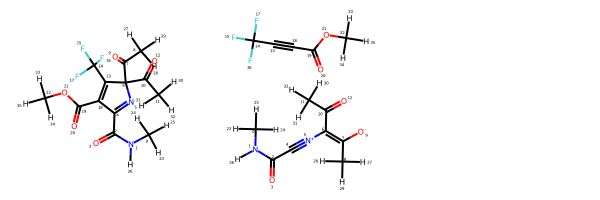

In [12]:
Draw.MolsToGridImage(TS_files[2][-1].possible_pre_post_ts())

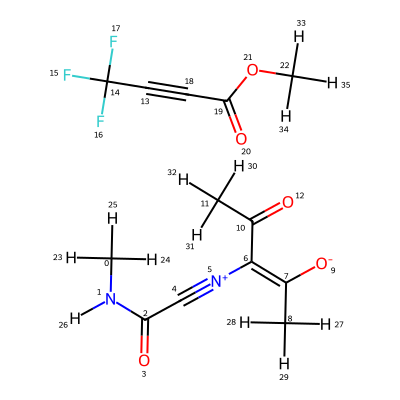

In [13]:
TS_files[2][-1].possible_pre_post_ts()[1]

In [14]:
TS_files[2][-1].imaginary_frequencies

[{'is imaginary': True,
  'freq': -300.8307 <Unit('reciprocal_centimeter')>,
  'reduced masses': 11.3735 <Unit('unified_atomic_mass_unit')>,
  'force constants': 0.6064 <Unit('millidyne / angstrom')>,
  'IR intensities': 63.598 <Unit('kilomole / mole')>,
  'normal coordinates': array([[ 0.08, -0.  , -0.05],
         [ 0.08, -0.05, -0.04],
         [ 0.06, -0.14, -0.  ],
         [ 0.03, -0.04, -0.  ],
         [ 0.03, -0.49, -0.01],
         [-0.04,  0.16,  0.03],
         [-0.13, -0.27,  0.03],
         [-0.03, -0.08,  0.03],
         [ 0.  ,  0.01,  0.02],
         [-0.04, -0.01, -0.02],
         [-0.03, -0.07, -0.01],
         [-0.02, -0.02,  0.01],
         [-0.  ,  0.03,  0.  ],
         [ 0.08,  0.37, -0.02],
         [-0.08,  0.07,  0.  ],
         [-0.04, -0.01,  0.  ],
         [-0.12,  0.08,  0.01],
         [-0.04,  0.  ,  0.  ],
         [ 0.01,  0.54,  0.02],
         [ 0.06,  0.01, -0.  ],
         [ 0.05, -0.05, -0.01],
         [ 0.06, -0.03,  0.01],
         [ 0.05, -0